### Project-Breast-Cancer (Model Exploration)
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Data import

In [1]:
# Load required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from ggplot import *
%matplotlib inline

# Model packages
from sklearn import model_selection, metrics, grid_search
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Models to use
from sklearn import svm

/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [5]:
# Import the training data
data_train_scaled = pd.read_csv('../output/data_train_scaled.csv', index_col = 0)

# Create array of predictors
X_train = data_train_scaled[data_train_scaled.columns.drop('diagnosis')]

# Create array of labels
Y_train = data_train_scaled['diagnosis']

# Map diagnosis to 0 and 1
Y_train = Y_train.map({'B': 0, 'M': 1})

In [6]:
# Import the testing data
data_test_scaled = pd.read_csv('../output/data_test_scaled.csv', index_col = 0)

# Create array of predictors
X_test = data_test_scaled.drop(['diagnosis'], axis=1)

# Create array of labels
Y_test = data_test_scaled['diagnosis']

# Map diagnosis to 0 and 1
Y_test = Y_test.map({'B': 0, 'M': 1})

### Baseling
What the baseline accuracy is without any optimization

In [8]:
from sklearn.dummy import DummyClassifier

# Create a DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=30)

# Fit training data
dummy.fit(X_train, Y_train)

# Get accuracy score
dummy.score(X_test, Y_test) 

0.61403508771929827

### (Simple) Support Vector Machine

In [4]:
# Logistic Regression
from sklearn import svm

# Create instance of the model
model = svm.SVC()

# Fit model
model.fit(X_train, Y_train)

# Predict on the testing dataset
Y_train_pred = model.predict(X_train)

# Print model evalulations scores
print('(Training) Accuracy:', metrics.accuracy_score(Y_train, Y_train_pred))
print('(Training) Recall:', metrics.recall_score(Y_train, Y_train_pred))
print('(Training) Precision:', metrics.precision_score(Y_train, Y_train_pred))

# Predict on the testing dataset
Y_test_pred = model.predict(X_test)

# Print model evalulations scores
print('(Testing) Accuracy:', metrics.accuracy_score(Y_test, Y_test_pred))
print('(Testing) Recall:', metrics.recall_score(Y_test, Y_test_pred))
print('(Testing) Precision:', metrics.precision_score(Y_test, Y_test_pred))

# Confusion matrix
print(metrics.confusion_matrix(Y_test, Y_test_pred))

(Training) Accuracy: 0.98021978022
(Training) Recall: 0.946428571429
(Training) Precision: 1.0
(Testing) Accuracy: 0.973684210526
(Testing) Recall: 0.931818181818
(Testing) Precision: 1.0
[[70  0]
 [ 3 41]]


### (Simple) Support Vector Machine with N variable's
only use radius_mean

In [5]:
# Create instance of the model
model = svm.SVC()

# Fit model
model.fit(X_train.iloc[:, 1:2], Y_train)

# Predict on the testing dataset
Y_train_pred = model.predict(X_train.iloc[:,1:2])

# Print model evalulations scores
print('(Training) Accuracy:', metrics.accuracy_score(Y_train, Y_train_pred))
print('(Training) Recall:', metrics.recall_score(Y_train, Y_train_pred))
print('(Training) Precision:', metrics.precision_score(Y_train, Y_train_pred))

# Predict on the testing dataset
Y_test_pred = model.predict(X_test.iloc[:,1:2])

# Print model evalulations scores
print('(Testing) Accuracy:', metrics.accuracy_score(Y_test, Y_test_pred))
print('(Testing) Recall:', metrics.recall_score(Y_test, Y_test_pred))
print('(Testing) Precision:', metrics.precision_score(Y_test, Y_test_pred))

# Confusion matrix
print(metrics.confusion_matrix(Y_test, Y_test_pred))

(Training) Accuracy: 0.885714285714
(Training) Recall: 0.738095238095
(Training) Precision: 0.939393939394
(Testing) Accuracy: 0.885964912281
(Testing) Recall: 0.772727272727
(Testing) Precision: 0.918918918919
[[67  3]
 [10 34]]


### (Kfold-CV) Support Vector Machine

In [6]:
# Create SVM model
model = svm.SVC(kernel='linear')

# Perform cross validation on training (KFold = 5)
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_macro')

# Get mean accuracy scores on training data
print("(Test) Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))

# Perform cross validation on testing (KFold = 5)
Y_test_pred = cross_val_predict(model, X_test, Y_test, cv=5)
metrics.accuracy_score(Y_test, Y_test_pred) 

(Test) Accuracy: 0.9642477494909325 (+/- 0.046050265625463965)


0.93859649122807021

### (Grid search) Support Vector Machine
GridSearch 

In [7]:
# Set SVM model
model = svm.SVC(kernel='linear')

# Set hyperparameters
param_C = 10. ** np.arange(-3, 8)
param_gamma = 10. ** np.arange(-5, 4)
parameters = {'C': param_C,
              'gamma': param_gamma}

# Grid search hyperparameters with 5-fold cross validation
grid_search = GridSearchCV(model, parameters, cv=5, scoring = 'accuracy')

# Search space to find best parameters
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04,
         1.00000e+05,   1.00000e+06,   1.00000e+07]), 'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

The best classifier is:  SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0000000000000001e-05,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


/Users/tom/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


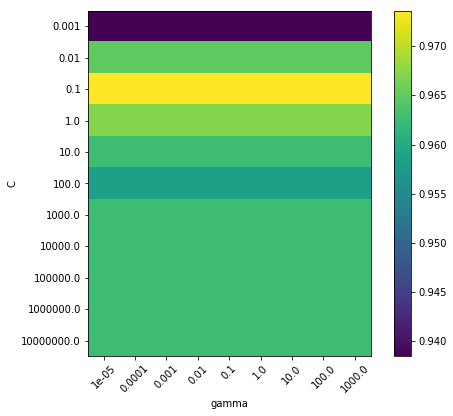

In [8]:
# Get best results
print("The best classifier is: ", grid_search.best_estimator_)

# Get just the scores
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(len(param_C), len(param_gamma))

# Make a nice figure
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest')
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_gamma)), param_gamma, rotation=45)
plt.yticks(np.arange(len(param_C)), param_C)
plt.show()

In [12]:
# Store best parameter
best_gamma = grid_search.best_estimator_.gamma
best_c = grid_search.best_estimator_.C

TypeError: predict() takes 2 positional arguments but 3 were given